In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
import matplotlib.pyplot as plt

In [21]:
def SSE(a,b):
    '''
    Computes the sum of squared errors given to arrays.
    '''
    return np.sum((a-b)**2)

In [22]:
# Load data
u_train = np.load('u_train.npy')
output_train = np.load('output_train.npy')
u_test = np.load('u_test.npy')

In [23]:
### INVESTIGATE DIFFERENT MODEL TYPES ###

# Define variables for comparison
best_SSE = np.Inf
best_params = (0,0,0,0)

# Loop over model order parameters n, m and d (integers in range [0,9])
for n in range(1,10):
    for m in range(10):
        for d in range(10):
            
            # Take care of special case: 
            # If n=1 no y-vaules will be used, and if m=0 no u-values will be used. Hence, no data will be used.
            if n == 1 and m == 0:
                continue

            # Construct regressor matrix
            p = max(n,d+m)
            N = len(output_train)
            phi = []
            for k in range(p,N):
                # Append previous output values (y) and input values (u)
                temp_array = np.hstack((output_train[k-n:k-1][::-1], u_train[k-d-m:k-d][::-1]))
                phi.append(temp_array)
            X = np.array(phi)

            # Adjust output vector
            Y = output_train[p:N]

            # Split data into training and validation set
            thres = int(0.75*len(Y))
            X_train = X[0:thres,:]
            Y_train = Y[0:thres]
            X_validation = X[thres:,:]
            Y_validation = Y[thres:]

            # Obtain model and prediction using ordinary least squares linear regression 
            model_LS = LinearRegression(fit_intercept=False)
            model_LS.fit(X_train, Y_train)
            prediction_LS = model_LS.predict(X_validation)
            SSE_LS = SSE(prediction_LS,Y_validation)

            if SSE_LS < best_SSE:
                best_SSE = SSE_LS
                best_params = (n,m,d,'LS')
                print(best_params, best_SSE)

            # Obtain model and prediction using Ridge regression with cross validation
            model_Ridge = RidgeCV(alphas=np.logspace(-5,5,1000), fit_intercept=False)
            model_Ridge.fit(X_train, Y_train)
            prediction_Ridge = model_Ridge.predict(X_validation)
            SSE_Ridge = SSE(prediction_Ridge,Y_validation)

            if SSE_Ridge < best_SSE:
                best_SSE = SSE_Ridge
                best_params = (n,m,d,'Ridge',model_Ridge.alpha_)
                print(best_params, best_SSE)

            #  Obtain model and prediction using Lasso regression with cross validation
            model_Lasso = LassoCV(alphas=np.logspace(-5,5,1000), fit_intercept=False)
            model_Lasso.fit(X_train, Y_train)
            prediction_Lasso = model_Lasso.predict(X_validation)
            SSE_Lasso = SSE(prediction_Lasso,Y_validation)

            if SSE_Lasso < best_SSE:
                best_SSE = SSE_Lasso
                best_params = (n,m,d,'Lasso',model_Lasso.alpha_)
                print(best_params, best_SSE)

(1, 1, 0, 'LS') 20901.824406201416
(1, 1, 1, 'LS') 19844.801735329063
(1, 1, 2, 'LS') 18597.956900163932
(1, 1, 3, 'LS') 17070.593826928296
(1, 1, 4, 'LS') 15048.214570469914
(1, 1, 5, 'LS') 12294.010423633128
(1, 1, 6, 'LS') 9741.987080455
(1, 1, 7, 'LS') 8221.977631306641
(1, 1, 8, 'LS') 8080.361635972105
(1, 2, 7, 'LS') 7419.215652805156
(1, 3, 6, 'LS') 7245.8520478397695
(1, 3, 7, 'LS') 7018.938714082605
(1, 4, 6, 'LS') 6816.323494227491
(1, 4, 7, 'LS') 6690.508706630457
(1, 5, 6, 'LS') 6457.54213673552
(1, 5, 7, 'LS') 6209.066928278883
(1, 6, 6, 'LS') 5933.845159335431
(1, 6, 7, 'LS') 5457.392526860496
(1, 7, 6, 'LS') 5121.524688296089
(1, 7, 7, 'LS') 4532.390065398689
(1, 8, 6, 'LS') 4117.322255170429
(1, 8, 7, 'LS') 3740.085617475089
(1, 9, 6, 'LS') 3238.455411765015
(2, 0, 0, 'LS') 2614.729357213113
(2, 0, 4, 'LS') 2614.4908259313993
(2, 0, 5, 'LS') 2614.490812219416
(2, 0, 6, 'LS') 2614.490800768662
(2, 0, 8, 'LS') 2614.2087003641914
(2, 1, 0, 'LS') 2065.33015967706
(2, 1, 0, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.795e+00, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.068e+01, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(3, 8, 6, 'LS') 411.79685197908975
(3, 8, 6, 'Ridge', 0.6379766808606282) 411.76587658688675


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+02, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+03, tolerance: 6.527e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(3, 9, 5, 'LS') 359.80050347097404
(3, 9, 5, 'Ridge', 0.785045620020451) 359.75624890234843


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+02, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.436e+02, tolerance: 6.527e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 1, 5, 'LS') 289.2471339023084
(4, 1, 5, 'Ridge', 0.10327947319189525) 289.2092934318629
(4, 1, 5, 'Lasso', 1e-05) 289.07362076185893


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.838e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.084e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 2, 4, 'LS') 287.2077463943884
(4, 2, 4, 'Ridge', 0.11589483034398118) 287.162753781045


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.831e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(4, 2, 4, 'Lasso', 1e-05) 287.0112398030749
(4, 2, 5, 'LS') 241.69241871074394
(4, 2, 5, 'Ridge', 0.16003103137387018) 241.65408800449774


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.992e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(4, 2, 5, 'Lasso', 1e-05) 241.54174017642225


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.173e+02, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.931e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 3, 4, 'LS') 240.44665819252475
(4, 3, 4, 'Ridge', 0.1714881969870541) 240.4012684872396


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(4, 3, 4, 'Lasso', 1e-05) 240.2743829671977
(4, 3, 5, 'LS') 173.66000997041914
(4, 3, 5, 'Ridge', 0.06365079081295572) 173.6381949701998


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.051e+02, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(


(4, 3, 5, 'Lasso', 1e-05) 173.34569548744793


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.022e+02, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 4, 4, 'LS') 170.50659074793063
(4, 4, 4, 'Ridge', 0.07832382599179197) 170.47885366908815


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+02, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(


(4, 4, 4, 'Lasso', 1e-05) 170.1782166892213
(4, 4, 5, 'LS') 162.93214901141272
(4, 4, 5, 'Ridge', 0.05416686911033152) 162.92555166917742


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(4, 4, 5, 'Lasso', 1e-05) 162.88668928046107


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.097e+02, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.511e+02, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 5, 4, 'LS') 161.178102176932
(4, 5, 4, 'Ridge', 0.06665363268124913) 161.16807766675896


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(4, 5, 4, 'Lasso', 1.2305240043592616e-05) 161.09183913679414
(4, 5, 5, 'LS') 160.54353792650497
(4, 5, 5, 'Ridge', 0.06365079081295572) 160.52532112823383


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e+02, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(


(4, 5, 5, 'Lasso', 1e-05) 160.28257608057316


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.035e+02, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.811e+02, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 6, 4, 'LS') 158.28419520327878
(4, 6, 4, 'Ridge', 0.07142559285543126) 158.26101865262802


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.955e+02, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(


(4, 6, 4, 'Lasso', 2.95440799888038e-05) 157.95439715040783


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e+02, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.031e+02, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 7, 3, 'Lasso', 1e-05) 157.9194331018037
(4, 7, 4, 'LS') 157.48873245843302
(4, 7, 4, 'Ridge', 0.06820776732865685) 157.47099250062828


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e+02, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+02, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 8, 3, 'LS') 157.44784604782774
(4, 8, 3, 'Ridge', 0.07142559285543126) 157.42926983615996


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.948e+02, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(


(4, 8, 4, 'LS') 155.47293048788163
(4, 8, 4, 'Ridge', 0.07309099328602911) 155.45264970629387


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+02, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(


(4, 8, 5, 'LS') 149.1471678814553
(4, 8, 5, 'Ridge', 0.06665363268124913) 149.11990895048


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+02, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+02, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(4, 9, 4, 'LS') 146.79738955406697
(4, 9, 4, 'Ridge', 0.07309099328602911) 146.76584067980042


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+02, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(


(4, 9, 5, 'LS') 136.29992584455934
(4, 9, 5, 'Ridge', 0.0505479682119124) 136.27982247755142


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+02, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.830e+02, tolerance: 6.527e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 2, 5, 'LS') 66.40040109396924
(5, 2, 5, 'Ridge', 1.0115911122238297) 66.39902922130146


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+02, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.690e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 3, 5, 'LS') 51.541197518711776
(5, 3, 5, 'Ridge', 0.10092621909870483) 51.5322991306694


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.802e+01, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 4, 4, 'LS') 51.469761329590156
(5, 4, 4, 'Ridge', 0.12136237983442417) 51.46053025193404


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e+01, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(


(5, 4, 5, 'LS') 48.79173198064417


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.425e+01, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+02, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 5, 4, 'LS') 48.34765166489281


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.392e+01, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(5, 5, 5, 'LS') 40.544707779502076


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.649e+01, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+02, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 7, 5, 'LS') 40.214669631957015


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.570e+01, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+02, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 8, 5, 'LS') 39.02918083608098
(5, 8, 5, 'Ridge', 0.4213321743847289) 39.02873486516702


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.415e+01, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.719e+02, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(5, 9, 5, 'LS') 37.32887643161402
(5, 9, 5, 'Ridge', 0.3345989120549975) 37.32037927586118


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.081e+01, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+02, tolerance: 6.527e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(6, 2, 5, 'LS') 28.056813195233953
(6, 2, 5, 'Ridge', 0.10327947319189525) 28.0452885496757


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.922e+01, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(


(6, 2, 5, 'Lasso', 2.8213076759394707e-05) 27.769701391492152


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+02, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.177e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(6, 3, 5, 'LS') 27.52806889329206
(6, 3, 5, 'Ridge', 0.1637624074521689) 27.51852565966054


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+01, tolerance: 6.541e+00
  model = cd_fast.enet_coordinate_descent(


(6, 3, 5, 'Lasso', 1e-05) 27.407679196031328


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+02, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.609e+02, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(6, 4, 5, 'LS') 23.897409492549716
(6, 4, 5, 'Ridge', 0.5066461008921268) 23.883803271836776


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.437e+01, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.500e+01, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(6, 5, 4, 'LS') 23.829070265234495
(6, 5, 4, 'Ridge', 0.5305480525369575) 23.81712233517272


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.385e+01, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+01, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(6, 6, 3, 'Ridge', 0.5305480525369575) 23.809228884750752


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.436e+01, tolerance: 6.539e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e+01, tolerance: 6.537e+00
  model = cd_fast.enet_coordinate_descent(


(6, 6, 5, 'LS') 19.15234658474091


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.861e+01, tolerance: 6.534e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.158567080344312, tolerance: 5.675913751054961
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.788347593772102, tolerance:

(6, 7, 5, 'LS') 18.84611077219308


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.691e+01, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.168871816101046, tolerance: 5.673734935651021
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.95214828928664, tolerance: 

(6, 8, 5, 'LS') 17.80649972864282
(6, 8, 5, 'Ridge', 2.266498079273693) 17.805650084368942


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+01, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+01, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(6, 9, 5, 'LS') 16.471702478641557
(6, 9, 5, 'Ridge', 2.066880249629082) 16.459562158387406


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+01, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.944392560744092, tolerance: 4.884247580824469
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or conside

(7, 7, 5, 'LS') 14.008939905586622
(7, 7, 5, 'Ridge', 1.0840143591783309) 13.991588039223709


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+01, tolerance: 6.535e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.967e+01, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(7, 8, 5, 'LS') 12.803626985270142
(7, 8, 5, 'Ridge', 2.266498079273693) 12.801507860283415


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+01, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.560928082359538, tolerance: 4.884904375393849
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or conside

(7, 9, 5, 'LS') 11.065570347894571
(7, 9, 5, 'Ridge', 4.321511127789762) 11.050799727019413


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+01, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+01, tolerance: 6.527e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

(8, 9, 5, 'LS') 10.46768796042119
(8, 9, 5, 'Ridge', 0.9014776314524917) 10.458724259702652


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+01, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.880818399757317, tolerance: 5.668708278608677
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.953959492629849, tolerance:

(9, 8, 5, 'LS') 10.367200874603705


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+01, tolerance: 6.532e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.331599484823528, tolerance: 5.671502119491604
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or conside

(9, 9, 5, 'LS') 9.983165929677106


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+01, tolerance: 6.530e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.827109920872431, tolerance: 5.668708278608677
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.869036212541744, tolerance:

In [24]:
print(f"The best parameters are (n,m,d,model): {best_params}")
print(f"The lowest sum of squared errors is: {best_SSE}")

The best parameters are (n,m,d,model): (9, 9, 5, 'LS')
The lowest sum of squared errors is: 9.983165929677106


In [25]:
### SET UP OPTIMAL MODEL ###

# Define model order parameters
n = 9
m = 9
d = 5

# Construct regressor matrix
p = max(n,d+m)
N = len(output_train)
phi = []
for k in range(p,N):
    # Append previous output values (y) and input values (u)
    temp_array = np.hstack((output_train[k-n:k-1][::-1], u_train[k-d-m:k-d][::-1]))
    phi.append(temp_array)
X = np.array(phi)

# Adjust output vector
Y = output_train[p:N]

# Train model
model_final = LinearRegression(fit_intercept=False)
model_final.fit(X, Y)

LinearRegression(fit_intercept=False)

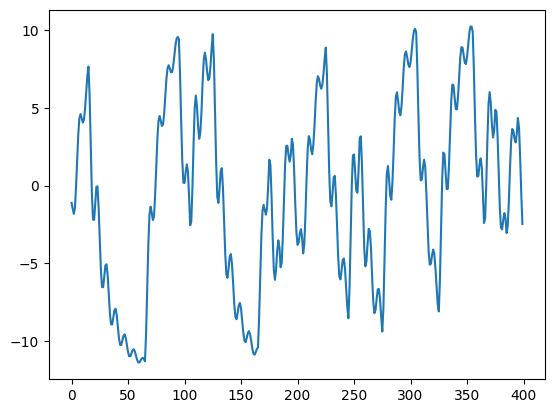

In [26]:
### MAKE PREDICTIONS ###

u_complete = np.hstack((u_train, u_test))
y_complete = output_train

for k in range(2040,len(u_complete)):
    inpt = np.hstack((y_complete[k-n:k-1][::-1], u_complete[k-d-m:k-d][::-1]))
    output_k = model_final.predict(inpt.reshape(-1, 1).T)
    y_complete = np.hstack((y_complete, output_k))

predictions = y_complete[-400:]

plt.plot(predictions)
plt.show()

In [27]:
# Save predictions for submission
np.save('predictions',predictions)